In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy import stats


In [103]:
#defining a function to create a normal random variable
def normalPDF(x,mean,variance):
  denominator = np.sqrt((2 * np.pi))*np.sqrt(variance)
  numerator = np.exp(-0.5 * ((x-mean)**2) / variance)
  pdf = numerator / denominator
  return pdf

Data for Bayes Classifier

In [115]:
N = 10000
#p0 = 0.95 => p1 (probability of success) = 0.05
y  = binom.rvs(n=1, p=0.05, size=N)
x = []
means = [0,1]
variance = [1,1]
dataset={}

In [116]:
for i in range(N):
    temp_x = 0
    if(y[i] == 0):
        temp_x = np.random.normal(means[0], variance[0])
    else:
        temp_x = np.random.normal(means[1],variance[1])
    dataset[temp_x] = y[i]
    x.append(temp_x)

In [106]:
#creating the bayes classifier to get the posteriors
def bayesClassifier(x):
 
  priors = [0.95,0.05]
  priors = np.array(priors)
  f_0x = normalPDF(x,0,1)
  f_1x = normalPDF(x,1,1)
  f_x = [f_0x,f_1x]
  f_x = np.array(f_x)
  posteriors = np.zeros(priors.shape)
  total=0
  for i in range(2):
    total = priors[i] * f_x[i]

  for i in range(2):
    posteriors[i] = (priors[i] * f_x[i]) / (total + 1e-4)

  return posteriors

Calculating the following metrics

In [107]:

truePositives=0
falsePositives = 0
trueNegatives = 0
falseNegatives = 0
classifications=[]
for inputs , labels in dataset.items():
    posteriors = bayesClassifier(inputs)
    q0 = posteriors[0]
    q1 = posteriors[1]
    if(q0>=q1):
        classifications.append(0)
        if(labels == 0):
            truePositives += 1
        else:
            falseNegatives += 1
    else:
        classifications.append(1)
        if(labels == 1):
            falsePositives += 1
        else:
            trueNegatives += 1
    

print('True Positives: ',truePositives)
print('False Positives: ',falsePositives)
accuracy = (truePositives + trueNegatives) / (trueNegatives + falseNegatives + truePositives + falsePositives)

confusionMatrix = [[truePositives, falsePositives],[falseNegatives, trueNegatives]]
print('ACCURACY: ',accuracy)
print('CONFUSION MATRIX: ',confusionMatrix)


True Positives:  9484
False Positives:  5
ACCURACY:  0.9487
CONFUSION MATRIX:  [[9484, 5], [508, 3]]


NEYMAN PEARSON CLASSFIER

In [117]:
#function to define likelihood ratio
def likelihoodRatio(x,means=[0,1],variance=[1,1]):
  f1 = normalPDF(x,means[1],variance[1])
  f0 = normalPDF(x,means[0],variance[0])
  ans = f1/f0
  return ans

In [118]:
#function to calculate the threshold values
def kvalue(alpha):
    phi = stats.norm(means[1],variance[1]).ppf(alpha)
    ln_k = ((means[1]-means[0])/variance[0])*phi-(((means[1]-means[0])**2)/2*variance[1]*variance[1])
    k = np.exp(ln_k)
    return k

In [119]:
 #Neyman Pearson Classifier
def npClassifier(x,y,threshold):
    predictions=0
    lhd = likelihoodRatio(x)
    if(lhd > threshold):
        predictions=1
    else:
        predictions=0
    return predictions

In [120]:

#function to calculate the metrics of the Neyman Pearson Classifier
def calulateMetrics(npcPredicitions , actualY):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(actualY)):
        if(actualY[i] == 0 and npcPredictions[i] == 0):
            tp+=1
        elif(actualY[i] == 1 and npcPredictions[i] == 0):
            fp += 1
        elif(actualY[i] == 1 and npcPredictions[i] == 1):
            tn += 1
        else:
            fn += 1
    return tp , tn , fp , fn

In [121]:
p = [0.95,0.05]
means = [0,1]
variance = [1,1]
alpha = 0.05
threshold = kvalue(alpha)

In [122]:
err1 = 0.8
threshold = kvalue(err1)
npcPredictions = []
correct=0
for i in range(len(x)):
    npcPredictions.append(npClassifier(x[i],y,threshold))
tp , tn , fp , fn = calulateMetrics(npcPredictions , y)

# npcPredictions = np.array(npcPredictions)
# print(npcPredictions)
for i in range(len(y)):
    if(y[i] == npcPredictions[i]):
       correct+=1
accuracy = correct / N
print(accuracy)


0.9277


Receiver Operating Characteristic Curve 

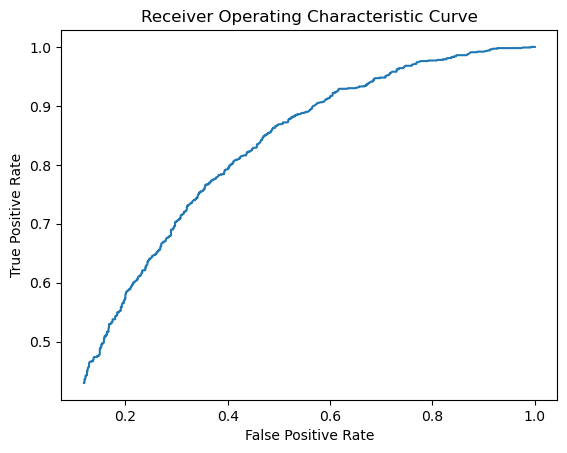

In [128]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# generating some data
X0 = np.random.normal(loc=0, scale=1, size=1000) #data for class 0
X1 = np.random.normal(loc=1, scale=1, size=1000) # data for class 1
X = np.concatenate((X0, X1))
y = np.concatenate((np.zeros(1000), np.ones(1000)))


thresholds = np.linspace(0, 2, 2000)
#generating 200 0 threshold values in between 0 and 2 with a common differenc eof 2/2000
truePositiveRates = []
falsePositiveRates = []
for threshold in thresholds:
    y_pred = likelihoodRatio(X) > threshold
    TP = np.sum((y_pred == 1) & (y == 1))
    FN = np.sum((y_pred == 0) & (y == 1))
    FP = np.sum((y_pred == 1) & (y == 0))
    TN = np.sum((y_pred == 0) & (y == 0))
    truePositiveRate = TP / (TP + FN)
    falsePositiveRate = FP / (FP + TN)
    truePositiveRates.append(truePositiveRate)
    falsePositiveRates.append(falsePositiveRate)

# plot the ROC curve
plt.plot(falsePositiveRates, truePositiveRates)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()


In [124]:
zeros = 0
ones = 1
for i in y:
    if(i == 0):
        zeros+=1
    else:
        ones+=1

In [125]:
def minMaxClassifier(x,means,variance,threshold,y):
    y_predictions=[]
    falsePositives = 0
    falseNegatives = 0
    for i in range(len(x)):
        if(x[i] > threshold):
            y_predictions.append(1)
            if(y[i] == 0):
                #predicting true but actually it is false
                falsePositives += 1
        else:
            y_predictions.append(0)
            #predicting false but actually it is true
            if(y[i] == 1):
                falseNegatives += 1

    cdf1 = stats.norm(means[0],variance[0]).cdf(threshold)
    cdf2 = 1 - stats.norm(means[1],variance[1]).cdf(threshold) 
    l_1_0 = falsePositives /zeros
    l_0_1 = falseNegatives / ones
    error = l_1_0 * cdf1 - l_0_1 * cdf2
    return error
    
    
        

In [126]:
errors = []
for threshold in thresholds:
    err = minMaxClassifier(X,means,variance,threshold,y)
    error.append(abs(err))

In [127]:
minThreshold = thresholds[minErros]
print("The threshold for which risk is independent of priors : ",minThreshold)

The threshold for which risk is independent of priors :  0.454
